# SIMULACIÓN | Pauta LABORATORIO 5


## Boostrap o remuestreo

In [64]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy 
from IPython.display import display, Math
import ipywidgets as widgets
import random
import scipy.stats as stats
import statistics

### Ejercicio 1
En un estudio sobre plantaciones de coihue, se ha recopilado información sobre la altura que alcanzan dichos árboles a los 20 años de edad, en diversas zonas de la región sur austral de Chile. A partir de dichos datos, estamos interesados en calcular un intervalo de confianza para la mediana de altura que alcanza esta especie a los 20 años de edad.
Para ello utilizaremos remuestreo o bootstrap.
1. Analice el código y evalue el número de muestras de bootstrap para alcanzar convergencia de la varianza estimada de la mediana.
2. Calcule el error cuadrático medio de la mediana.
3. Escoja otro estadístico de la muestra y calcule su incerteza con la técnica de boostrap
4. Compare y comente sus resultados.

In [65]:
datos = stats.lognorm.rvs(1,9,2,size=40)
datos

array([13.50243693, 13.50535325, 12.28658461,  9.52316537, 11.81828967,
        9.88243408, 13.44162268, 17.28397531,  9.80831968, 10.69608968,
       13.60692876, 13.86466333, 12.59824778,  9.69981737, 25.82536191,
       10.04014179,  9.57590635, 12.18471387,  9.21741521, 16.3627729 ,
        9.76938908,  9.72991553, 11.51761132, 13.47336   , 10.47656564,
       10.48242588, 15.97939743, 10.71250804,  9.99766231, 11.03181099,
       15.76619808, 11.4637414 ,  9.72255396, 10.32394434, 19.427554  ,
       10.01856351, 10.14799027,  9.89282583, 11.82225206, 12.28792629])

In [66]:
datos = [12.5,11.4,18.4,10.7,9.5,11.7,15.4,12.3,18.6, 14.7, 10.7,11.6, 10.1, 8.2, 11.4,21.1, 12.1, 7.5, 12.5, 14.7, 10.3, 5.4, 9.4, 13.8, 9.6, 11.3, 14.8, 12.6]
len(datos)

28

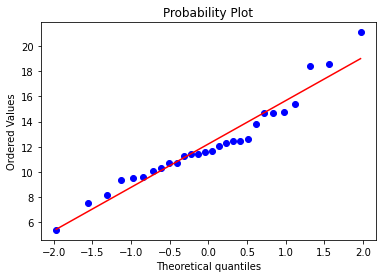

In [73]:
import pylab
stats.probplot(datos,dist='norm',plot=pylab)
pylab.show()

In [67]:

m = statistics.median(datos)
print (m)
b=100
mm = 0
mn =[]
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    mn.append(statistics.median(dat))
    
var = statistics.variance(mn)
print(var)
rango = 1.96*math.sqrt(var)
display(Math('%0.2f \pm %0.2f' % (m, rango )))

              

11.649999999999999
0.27887348484848484


<IPython.core.display.Math object>

11.649999999999999


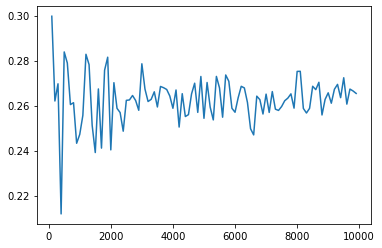

In [68]:
## Ejercicio 1.1

n=28
m = statistics.median(datos)
print (m)
var = []
for b in range(100,10000,100):
    mm = 0
    mn =[]
    for i in range(b):
        dat = np.random.choice(list(datos),size=n,replace=True)
        mn.append(statistics.median(dat))
    
    var.append(statistics.variance(mn))
plt.plot(range(100,10000,100),var)


**Respuesta 1.1** Se alcanza convergencia al considerar 2000 o mas muestras bootstrap.

In [69]:
p= statistics.mean(var[25:100])
rango = statistics.stdev(var[25:100])
display(Math('%0.3f \pm %0.3f' % (p, rango )))

<IPython.core.display.Math object>

In [70]:
#Ejercicio 1.2
from IPython.display import Math

n=28
m = statistics.median(datos)
print (m)
b=2000
mm = 0
mse=0
for i in range(b):
    dat = np.random.choice(list(datos),size=n,replace=True)
    mse = mse + (statistics.median(dat)-m)**2

mse= mse/b
print(mse)


11.649999999999999
0.3014137500000002


3.401810520122309


<IPython.core.display.Math object>

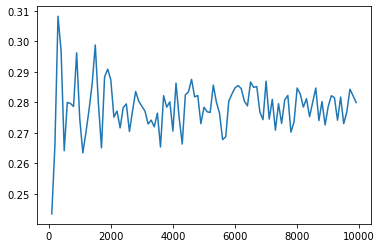

In [71]:
#Ejercicio 1.3
#Calcularemos la incerteza de la desviación estandar de los datos
from IPython.display import Math



n=28
des= statistics.stdev(datos)
print (des)
s_mse = []
s_var = []

for b in range(100,10000,100):
    mse=0
    desB= []
    for i in range(b):
        dat = np.random.choice(list(datos),size=n,replace=True)
        desdat = statistics.stdev(dat)
        mse = mse + (desdat-des)**2
        desB.append(desdat)
    
    s_mse.append(mse/(b-1))
    s_var.append(statistics.variance(desB))

#grafico de comportamiento varianza de estimaciones bootstrap de la desviación estándar
plt.plot(range(100,10000,100),s_var)

#intervalo de confianza al  95% para la varianza con bootstrap

varT = s_var[len(s_var)-1]
rango = 1.96* math.sqrt(varT)
display(Math('%0.1f \pm %0.1f' % (des, rango )))

**Respuesta 1.4** Se calculó la incerteza de la desviación estándar y aunque parece haber una estabilización con 2000 muestras, la variabilidad se reduce considerando 6000 muestras. Lo que indica que la convergencia de la varianza empírica depende del estadístico calculado.

### Ejercicio 2

Suponga que los datos previamente registrados provienen de una distribución normal de parámetros $(\mu,\sigma)$

1. Calcule los estimadores máximo verosímil de $\hat{\mu}$ y $\hat{\sigma}$
2. Utilice boostrap paramétrico para estimar la incerteza de $\hat{\mu}$ y $\hat{\sigma}$ . Estime el número de muestras para alcanzar convergencia. Comente sus resultados.



De acuerdo a las sesiones anteriores sabemos que:

$$\hat{\mu} = \frac{\sum_{i=1}^n x_i}{n} \qquad \mbox{y} \qquad \hat{\sigma} = \sqrt{\frac{\sum_{i=1}^n (x_i - \hat{\mu})^2}{n-1}}$$

In [80]:
# estimadores máximo verosímiles de mu y sigma
m = statistics.mean(datos)
d = statistics.stdev(datos)

print(m,d)

12.225 []


<IPython.core.display.Math object>

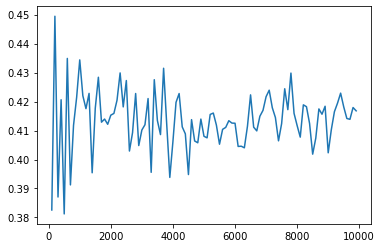

In [84]:
#Ejercicio 2.2
from IPython.display import Math
n=28
var_mu = []
var_dev = []

for b in range(100,10000,100):
    mu = []
    dev = []
    for i in range(b):
        dat = stats.norm.rvs(loc=m,scale=d, size=n) 
        mu.append(statistics.mean(dat))
        dev.append(statistics.stdev(dat))
        
    var_mu.append(statistics.variance(mu))
    var_dev.append(statistics.variance(dev))
    
#grafico de comportamiento varianza de estimaciones bootstrap de mu y sigma
plt.plot(range(100,10000,100),var_mu)

#intervalo de confianza al  95% para la varianza con bootstrap
varT = var_mu[len(var_mu)-1]
rango = 1.96*math.sqrt(varT)
display(Math('%0.2f \pm %0.2f' % (m, rango )))

<IPython.core.display.Math object>

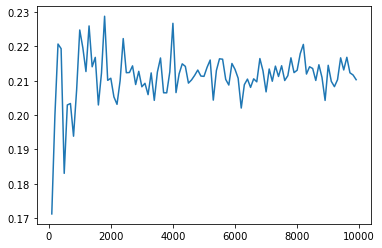

In [85]:
#grafico de comportamiento varianza de estimaciones bootstrap de sigma
plt.plot(range(100,10000,100),var_dev)

#intervalo de confianza al  95% para la desviación estándar con bootstrap
varT = var_dev[len(var_dev)-1] 
rango = 1.96*math.sqrt(varT)
display(Math('%0.2f \pm %0.2f' % (d, rango )))

**Respuesta 2** Se calculó la incerteza de media y desviación estándar y en ambos casos se observa convergencia con 4000 o mas muestras bootstrap